# Clustering

## K nearest neighbours
Description
- points that are close together are often in the same cluster
- find some value k
- this value denotes the number of nearest neighbours to a certain point you are looking at
- measure the distance of this point to the k other points
 - usually euclidian distance
- can either do classification or regression???
  - explore regression more in **next cell**
- classification: will assign a discrete class to the point in question based on the classes of the k nearest neighbours to that class
  - usually the one the majority of the neighbours belong to
- there is no training phase
- the training is a labelled set, you are introducing one new point to this already labelled set in the same dimensions/domain


### an aside about knn and regression
- a new point stil look at its k nearest neighbours
- it is given X values perhaps and needs to estimate through knn regressions the y value (or in higher dimensions X is some highger dimension vector)
- to estimate y it takes the average of all k nearest neighbour y values (possibly taking in weighted average with distance)
  - make sure you invert the weight and distance
  - so that points closer have higher weights!

Let's play around with customer personality dataset from kaggle

In [1]:
# !pip install -q kaggle
# from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
'''
%mkdir ~/.kaggle
%cp kaggle.json ~/.kaggle/
%chmod 600 ~/.kaggle/kaggle.json
%kaggle datasets download -d imakash3011/customer-personality-analysis
'''


  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 44.5MB/s]


In [ ]:
# !unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [56]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.head(3))
columns = df.columns
print(columns)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         

visualizing the data

unqiue values dont tell us much for the numerical columns so we need further exploration with that but we can make some plots for the discrete, non numerical values

In [57]:
#look at all unque values in each column
labels = []
for names in columns:
    labels.append(df[names].unique())
    print(names, df[names].unique()[:10])

ID [5524 2174 4141 6182 5324 7446  965 6177 4855 5899]
Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Kidhome [0 1 2]
Teenhome [0 1 2]
Dt_Customer ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014']
Recency [58 38 26 94 16 34 32 19 68 11]
MntWines [635  11 426 173 520 235  76  14  28   5]
MntFruits [88  1 49  4 43 42 65 10  0  5]
MntMeatProducts [546   6 127  20 118  98 164  56  24  11]
MntFishProducts [172   2 111  10  46   0  50   3   1  11]
MntSweetProducts [ 88   1  21   3  27  42  49   2 112   5]
MntGoldProds [88  6 42  5 15 14 27 23  2 13]
NumDealsPurchases [ 3  2  1  5  4 15  7  0  6  9]
NumWebPurchases [ 8  1  2  5  6  7  4  3 11  0]
NumCatalogPurchases [10  

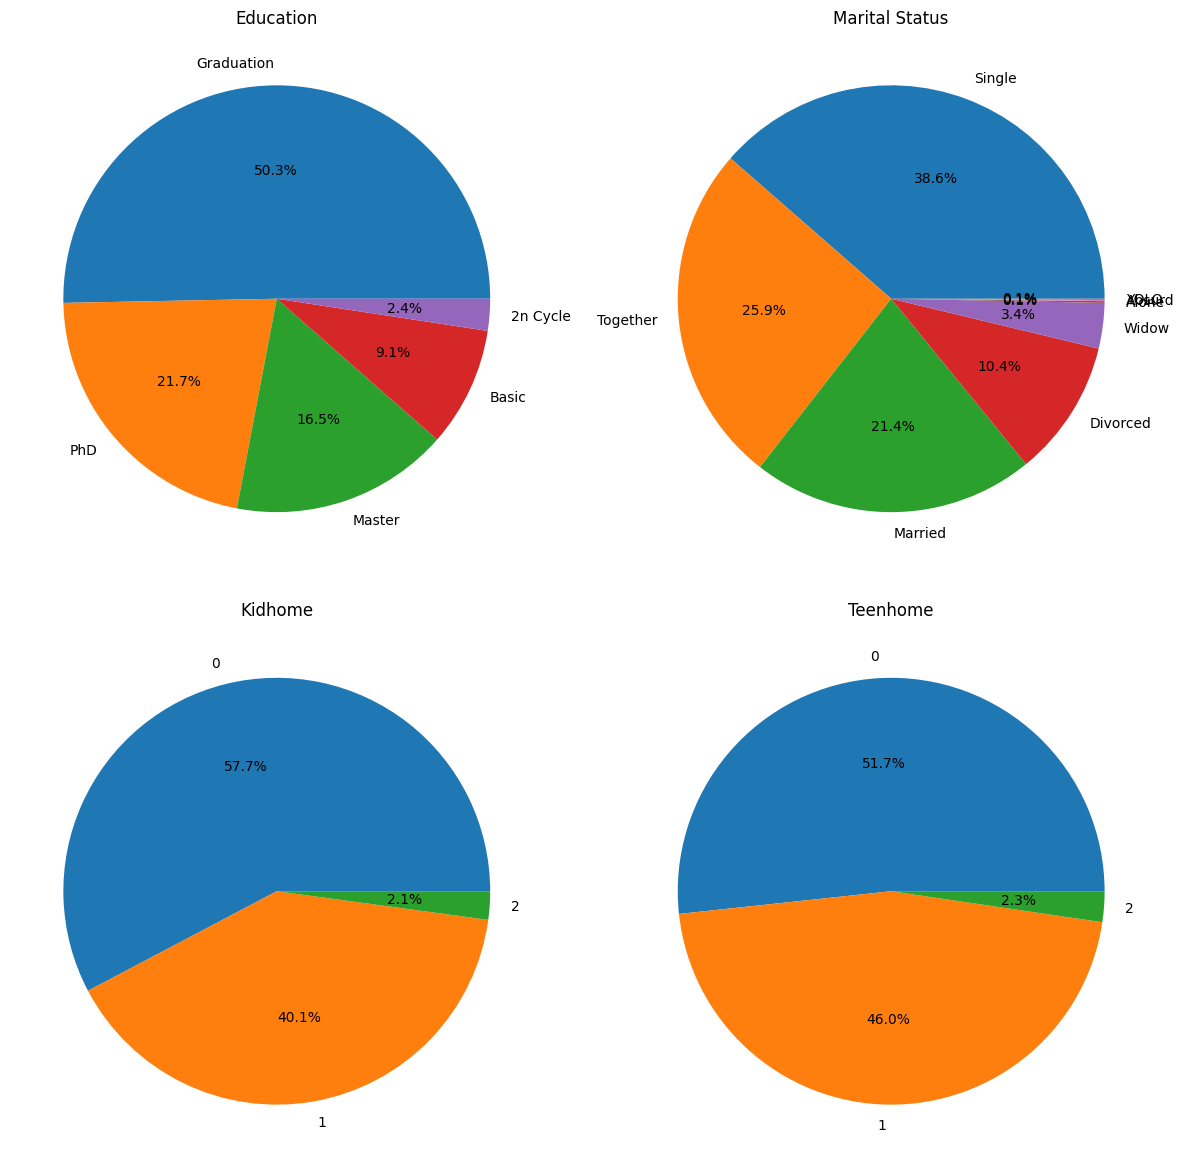

In [58]:
#lets visualize some of the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].pie(df['Education'].value_counts(), labels=labels[2], autopct='%1.1f%%')
axs[0, 0].set_title('Education')

axs[0, 1].pie(df['Marital_Status'].value_counts(), labels=labels[3], autopct='%1.1f%%')
axs[0, 1].set_title('Marital Status')

axs[1, 0].pie(df['Kidhome'].value_counts(), labels=labels[5], autopct='%1.1f%%')
axs[1, 0].set_title('Kidhome')

axs[1, 1].pie(df['Teenhome'].value_counts(), labels=labels[6], autopct='%1.1f%%')
axs[1, 1].set_title('Teenhome')


plt.tight_layout()
plt.show()


cleaning the data

In [106]:
df_clean = df.copy()
df_clean = df_clean.dropna()
df_clean.drop('ID', inplace=True, axis=1)
df_clean.drop('Kidhome', inplace=True, axis=1)
df_clean.drop('Teenhome', inplace=True, axis=1)
print(df_clean.head)


<bound method NDFrame.head of       Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0           1957  Graduation         Single  58138.0  04-09-2012       58   
1           1954  Graduation         Single  46344.0  08-03-2014       38   
2           1965  Graduation       Together  71613.0  21-08-2013       26   
3           1984  Graduation       Together  26646.0  10-02-2014       26   
4           1981         PhD        Married  58293.0  19-01-2014       94   
...          ...         ...            ...      ...         ...      ...   
2235        1967  Graduation        Married  61223.0  13-06-2013       46   
2236        1946         PhD       Together  64014.0  10-06-2014       56   
2237        1981  Graduation       Divorced  56981.0  25-01-2014       91   
2238        1956      Master       Together  69245.0  24-01-2014        8   
2239        1954         PhD        Married  52869.0  15-10-2012       40   

      MntWines  MntFruits  MntMeatProducts  M

need to covnert some entries that are not numerical into some numerical representation

the date is tricky, i will need to find the earliest date and work relative to that

In [107]:
## converting string dates to datetime format
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')
print(df_clean['Dt_Customer'])
earliest_date = df_clean['Dt_Customer'].min()
print("earliest date: ", earliest_date)


0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]
earliest date:  2012-07-30 00:00:00


In [108]:
columns = df_clean.columns  
label_encoder = LabelEncoder()

for name in columns:
    if name == 'Dt_Customer':
        df_clean[name] = (df_clean[name] - earliest_date).dt.days
    elif df_clean[name].dtype not in ['int64', 'float64'] or len(df_clean[name].unique()) < 3:
       df_clean.drop(name, inplace=True, axis=1)


In [109]:
columns = df_clean.columns
labels = []
for names in columns:
    labels.append(df_clean[names].unique())
    print(names, df_clean[names].unique()[:10])

Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Income [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Dt_Customer [ 36 586 387 560 538 406 106 282 311 591]
Recency [58 38 26 94 16 34 32 19 68 59]
MntWines [635  11 426 173 520 235  76  14  28   6]
MntFruits [88  1 49  4 43 42 65 10  0 16]
MntMeatProducts [546   6 127  20 118  98 164  56  24  11]
MntFishProducts [172   2 111  10  46   0  50   3   1  11]
MntSweetProducts [ 88   1  21   3  27  42  49 112   5  68]
MntGoldProds [88  6 42  5 15 14 27 23  2 13]
NumDealsPurchases [ 3  2  1  5  4 15  7  6  9  0]
NumWebPurchases [ 8  1  2  5  6  7  4  3 11  0]
NumCatalogPurchases [10  1  2  0  3  4  6 28  9  5]
NumStorePurchases [ 4  2 10  6  7  0  3  8  5 12]
NumWebVisitsMonth [ 7  5  4  6  8  9 20  2  3  1]


In [110]:
# get max and min of all columns
for name in columns:
    print(name, df_clean[name].max(), df_clean[name].min())

Year_Birth 1996 1893
Income 666666.0 1730.0
Dt_Customer 699 0
Recency 99 0
MntWines 1493 0
MntFruits 199 0
MntMeatProducts 1725 0
MntFishProducts 259 0
MntSweetProducts 262 0
MntGoldProds 321 0
NumDealsPurchases 15 0
NumWebPurchases 27 0
NumCatalogPurchases 28 0
NumStorePurchases 13 0
NumWebVisitsMonth 20 0


Text(0, 0.5, 'Explained Variance')

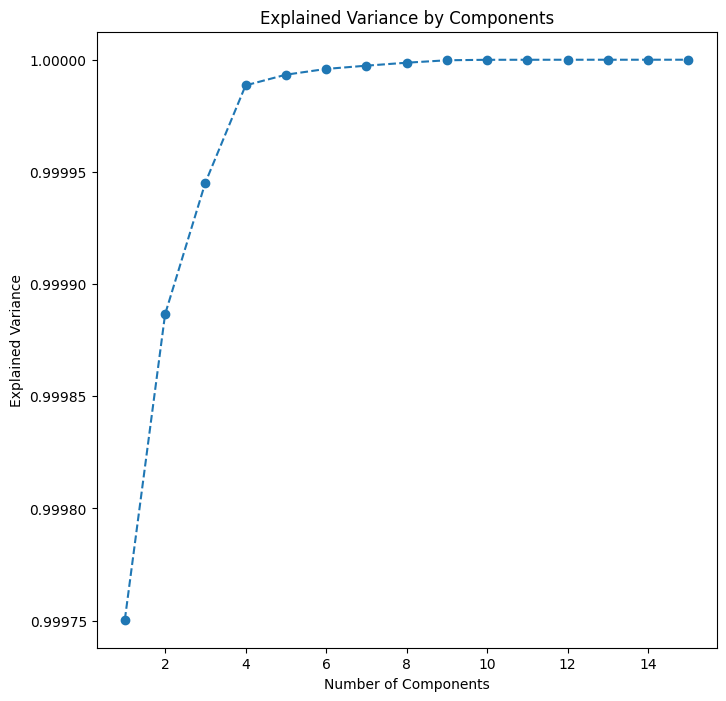

In [112]:
# find min and max of each column
scalar = StandardScaler()
#print(df_clean.head())
clean_array = scalar.fit_transform(df_clean)
pca = PCA()
principalComponents = pca.fit(df_clean)

plt.figure(figsize=(8, 8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

looking at graph to keep 80% of the variance we'd need to keep 5 dimensions!

keep following this: https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [114]:
## normalize the data and PCA

# perform PCA as above, need 4 components to explain 80% of the variance

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(clean_array)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 
                                                              'principal component 3', 'principal component 4'])

print(principalDf.head(5))


   principal component 1  principal component 2  principal component 3  \
0               3.792296               1.442560              -1.189740   
1              -2.121084              -1.244707               1.428385   
2               1.665943              -0.064904               0.499791   
3              -2.375429              -0.992986              -0.552815   
4              -0.066797               0.114154              -0.203347   

   principal component 4  
0               0.490815  
1              -0.257365  
2              -0.965207  
3              -0.910321  
4               1.302695  


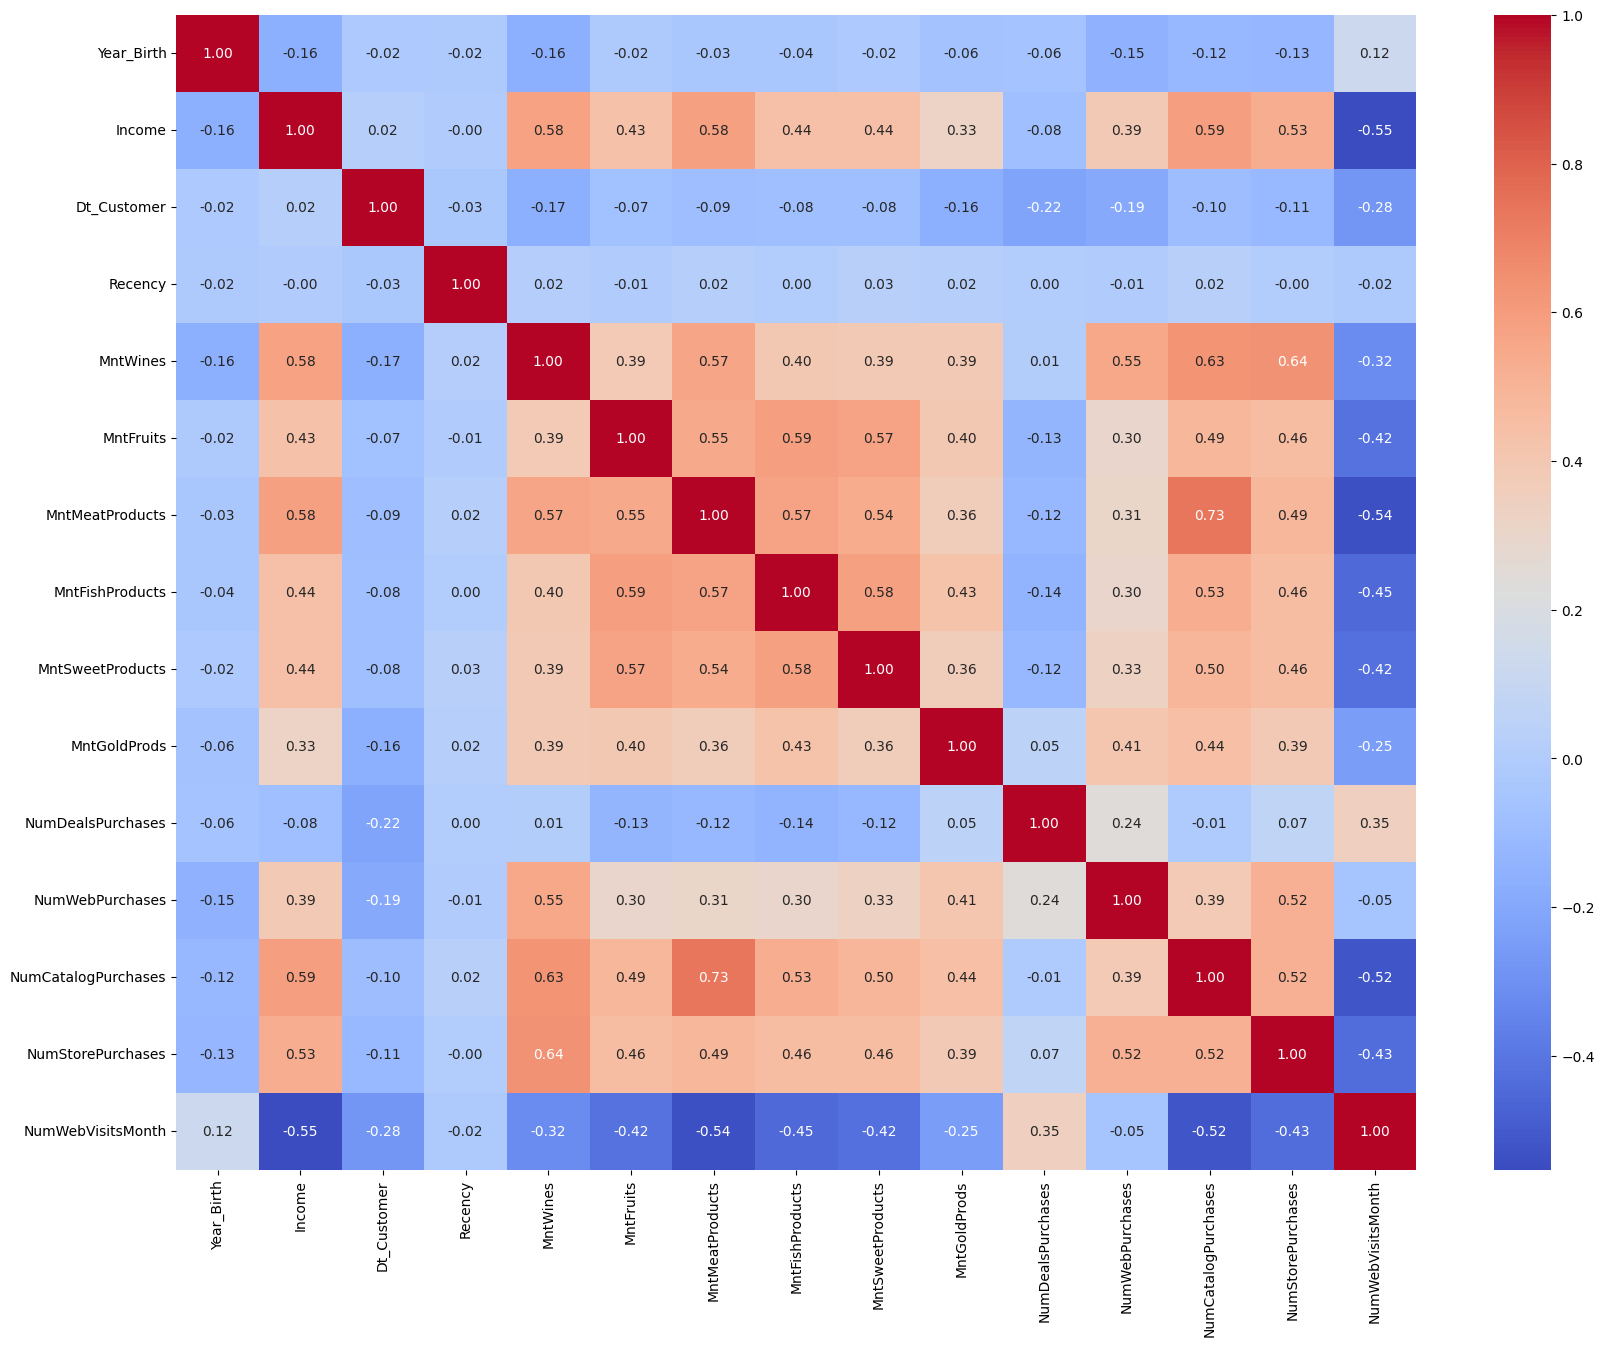

In [115]:
correlation_matrix = df_clean.corr()

# Set the size of the figure
plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


calculate correlations -- find highest ones

will work with
- NumCatalogPurchases        
- MntMeatProducts            
- MntWines                   
- Income                     
- MntFishProducts            
- NumStorePurchases          
- MntSweetProducts           
- MntFruits                  
- MntGoldProds               
- NumWebPurchases       
- NumDealsPurchases     
- Dt_Customer

need to create some scatter plots for certain axes

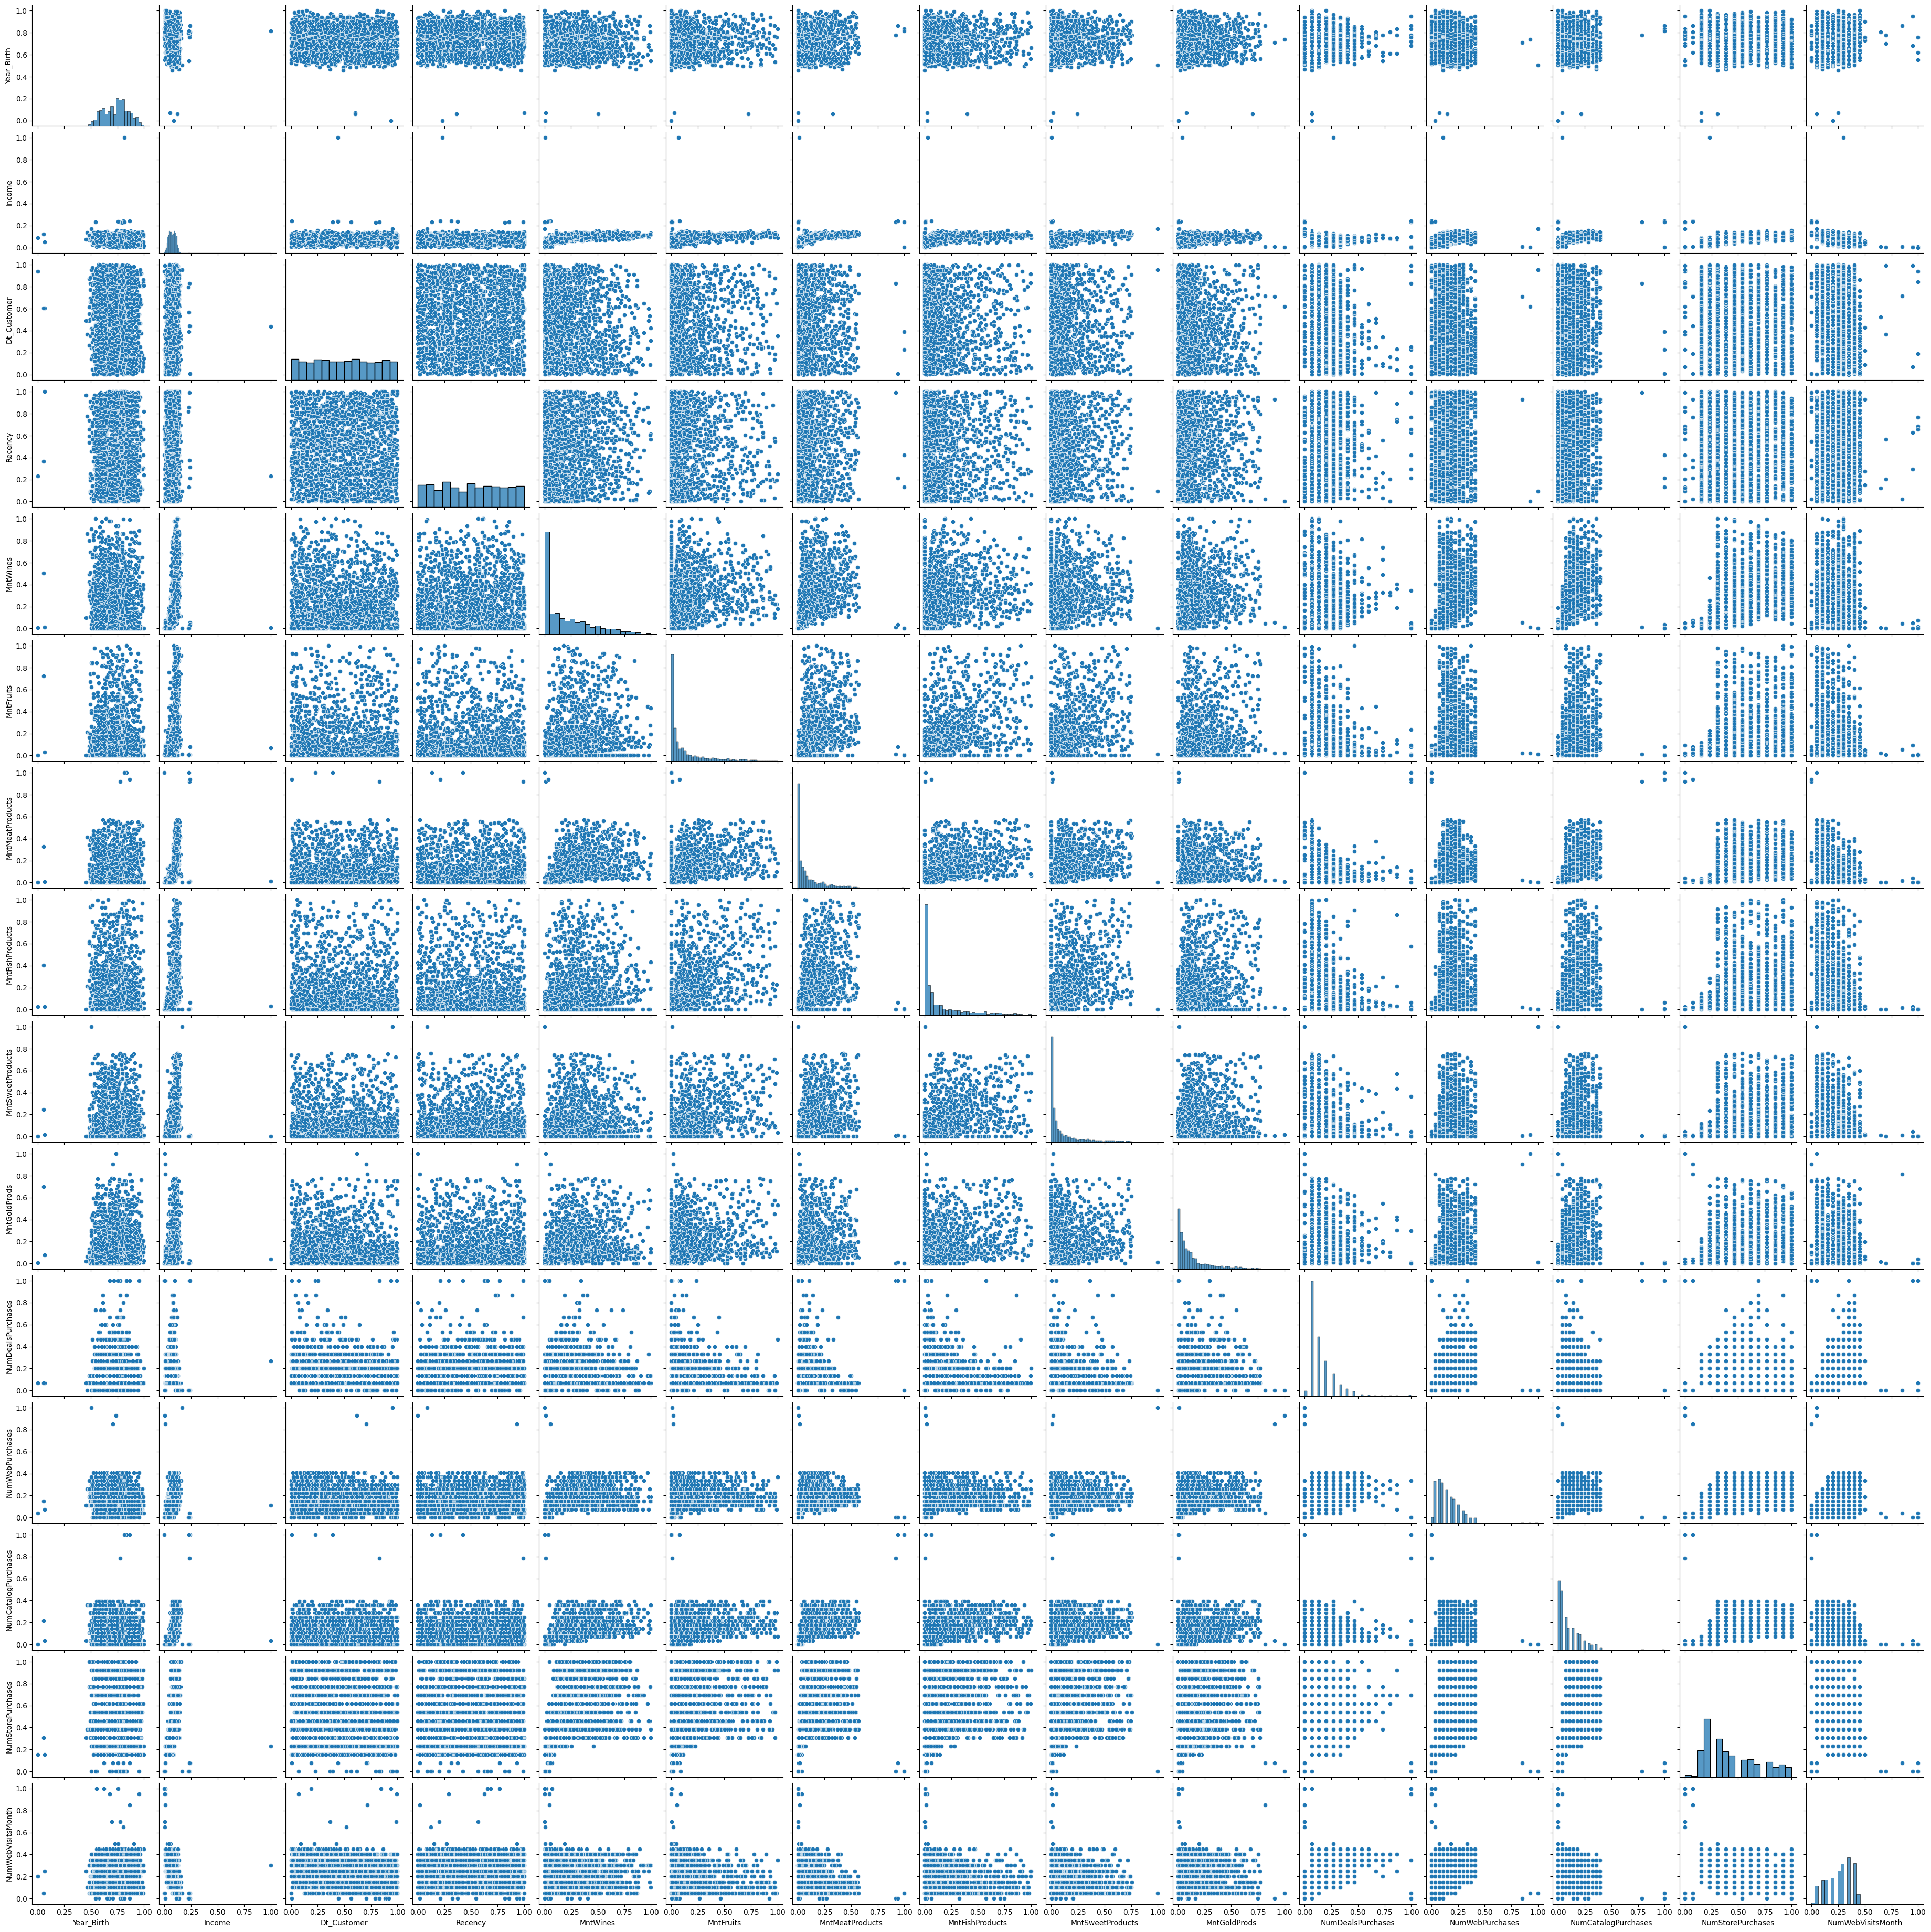

In [31]:

sns.pairplot(df_clean)


Creating K means algorithm/model

the dataset provided does not have labels so knn cannot work

In [116]:
class KMeans():
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = []
    def fit(self, data):
        for i in range(self.k):
            self.centroids.append(data[i])
        for i in range(self.max_iter):
            self.clusters = []
            for j in range(self.k):
                self.clusters.append([])
            for feature in data:
                distances = [np.linalg.norm(feature-self.centroids[k]) for k in range(self.k)]
                cluster_belong = distances.index(min(distances))
                self.clusters[cluster_belong].append(feature)
            for k in range(self.k):
                self.centroids[k] = np.average(self.clusters[k], axis=0) # find mean location of all points in cluster and change centroid to that location
        return self.clusters, self.centroids
        


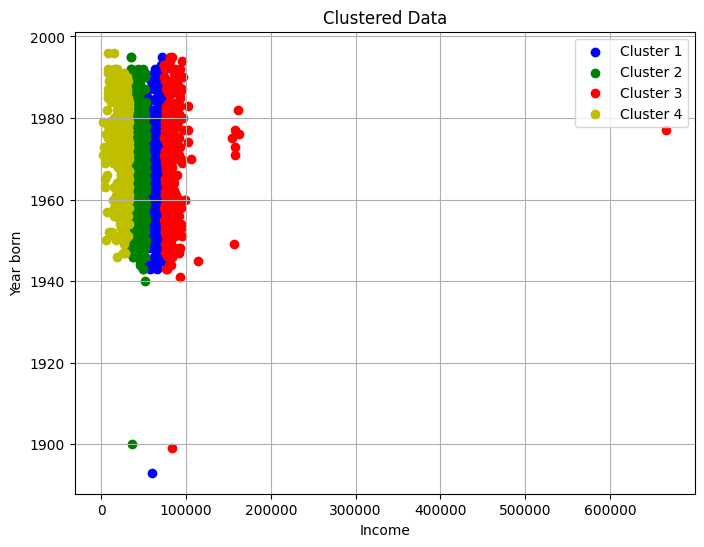

In [120]:
## lets try to cluster the data into 2 clusters

kmeans = KMeans(k=4, max_iter=100)
clusters, centroids = kmeans.fit(df_clean.values)
colors = ['b', 'g', 'r', 'y']  # List of colors for different clusters
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for cluster_id, cluster_points in enumerate(clusters):
    x = [point[1] for point in cluster_points]
    y = [point[0] for point in cluster_points]
    plt.scatter(x, y, c=colors[cluster_id], label=f'Cluster {cluster_id + 1}')

plt.xlabel('Income')
plt.ylabel('Year born')
plt.title('Clustered Data')
plt.legend()
plt.grid(True)
plt.show()

above is without PCA

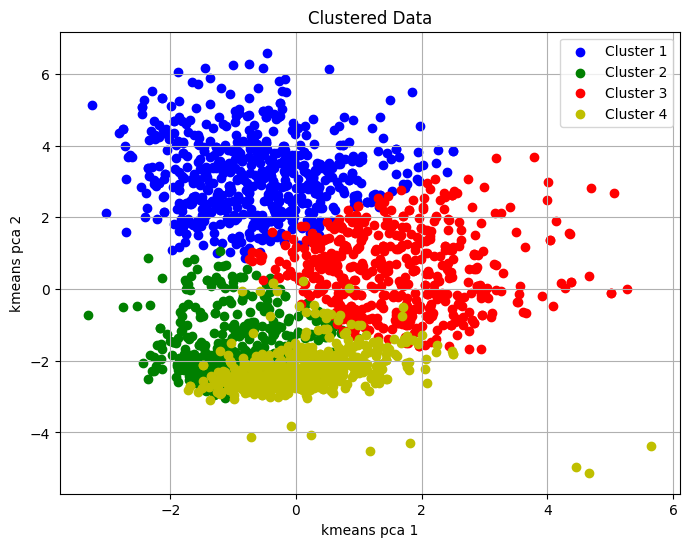

In [121]:
## clustering pca data
kmeans = KMeans(k=4, max_iter=100)
clusters, centroids = kmeans.fit(np.array(principalDf))
colors = ['b', 'g', 'r', 'y']  # List of colors for different clusters
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for cluster_id, cluster_points in enumerate(clusters):
    x = [point[1] for point in cluster_points]
    y = [point[0] for point in cluster_points]
    plt.scatter(x, y, c=colors[cluster_id], label=f'Cluster {cluster_id + 1}')

plt.xlabel('kmeans pca 1')
plt.ylabel('kmeans pca 2')
plt.title('Clustered Data')
plt.legend()
plt.grid(True)
plt.show()

so kmeans algorithm
- you start by randomly -- or using heuristics assigning centroids to the k amount of clusters you want to create
- then you find the distance from each point to each centroid
- you assign the point to the cluster that its closest to
- you then move the centroid location based on the average location of all the dots in that cluster combined
- you re calculate untill you are happy with the results
- i can see hwo if there is a really big outlier it can skey the venter of a cluster a lot and maek the clusters very bad
- additionally bad initialization can cause one centroid to always be closer to the points than the other and you will have errors in "training"

# BDSCAN (Density-based spatial clustering of applications with noise (DBSCAN))
## Background
unsupervised
groups together points that are close based on some distance measurement (this is something the user must input or decide as a parameter)
parameters required
- eps: how close points should be together to be considered as part of the same cluster
    - if distance between two points lower or equal to this value, they are part of the same cluster
- min points: minimum number of points in a certain regium to form a dense region

choosing parameters is a large part of making this algorithm successful

https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80